# Delay experiment
how does delay time affect training?
- 2 orthogonal stimuli
- reward: +1 hold +1 final action 0 otherwise

In [7]:
import sys
import os
import itertools
import numpy as np
import torch as tr
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')

from utils import *

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# single condition of experiment
def exp(delay,neps,nseeds):
  reward = np.zeros([nseeds,neps])
  for s in range(nseeds):
    actor = ActorCritic()
    task = PWMTask(stim_set=[(0,1),(1,0)])
    env = Env(actor,task)
    for ep in range(neps):
      data = env.run_pwm_trial(delay=delay,update=True)
      reward[s,ep]=data['reward'][-1]
  return reward


In [3]:
# run experiment over delay conditions
nseeds,neps=10,100000
L = []
for delay in range(1,10,2):
  R = exp(delay,neps,nseeds)
  L.append(R)
results = np.array(L)

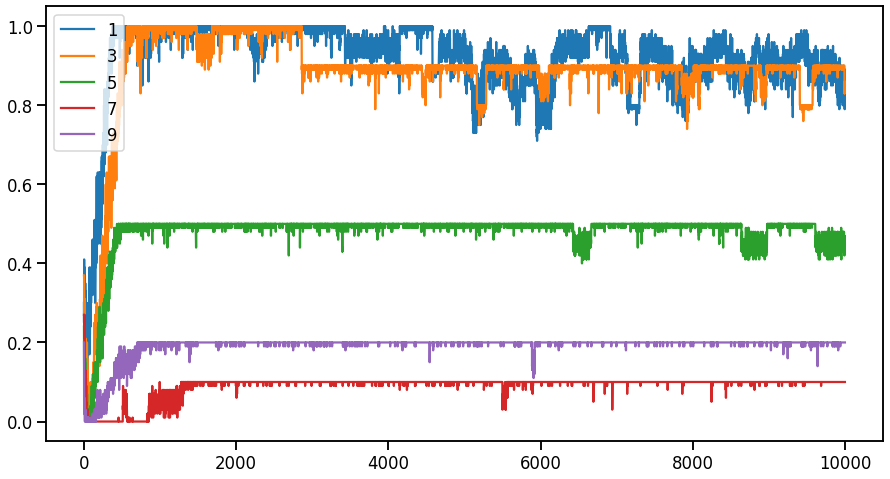

In [11]:
plt.figure(figsize=(15,8))
for d,res in zip(range(1,10,2),results):
  M = res.mean(0) 
  S = res.std(0) / np.sqrt(len(res))
  M = M.reshape(-1,10).mean(1)
  plt.plot(M,label=d)
plt.legend()
plt.savefig('figures/delaylen')